# Init

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import skimage

In [3]:
testvideo = cv2.VideoCapture("data/testvideo_git/outputA.avi")
testvideo.isOpened()

True

# Basic Image Preprocessing

In [4]:
test, frame = testvideo.read()

In [5]:
height, width, _ = frame.shape
print(f"basic height: {height},\nbasic width: {width}")

basic height: 480,
basic width: 640


In [6]:
resizeHeight = int(height/1.5)
resizeWidth = int(width/1.5)
croppedHeight = int(2*resizeHeight/5)
print(f"Resized shape:\nresized height: {resizeHeight},\nresized width: {resizeWidth},\ncropped height: {croppedHeight}")

Resized shape:
resized height: 320,
resized width: 426,
cropped height: 128


Readed Frame


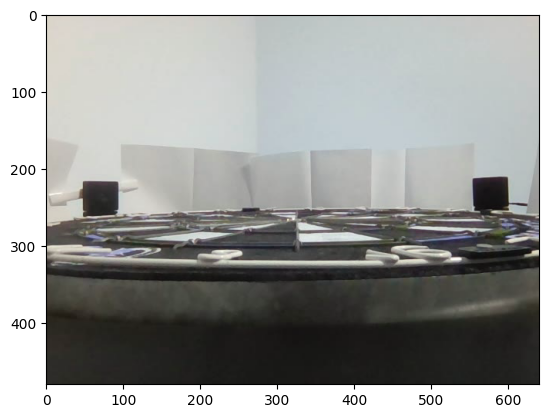

ResizedTestFrame


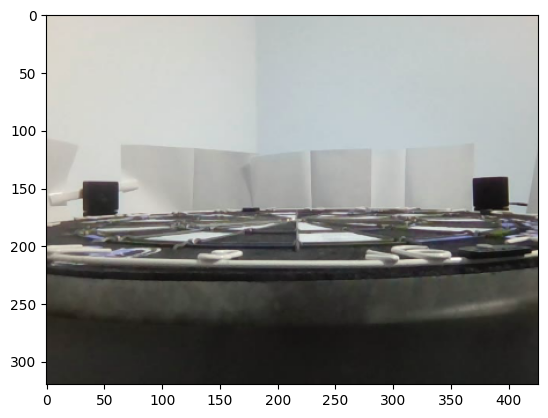

CroppedTestFrame


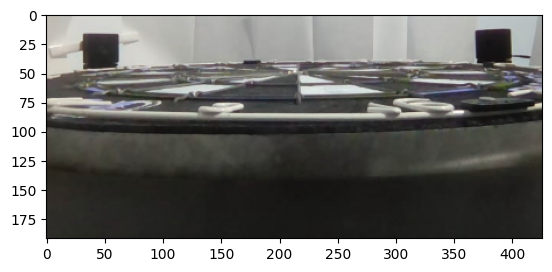

In [7]:
retval, frame = testvideo.read()
if not retval:
    print("Keine weiteren Frames verfügbar oder Videoproblem.")

# original readed image
print("Readed Frame")
readedframe = plt.imshow(frame)
plt.show(readedframe)

# resized image
resizedFrame = cv2.resize(frame, (resizeWidth, resizeHeight))
print("ResizedTestFrame")
resizedTestFrame = plt.imshow(resizedFrame)
plt.show(resizedTestFrame)

# cropped image
croppedFrame = resizedFrame[croppedHeight:resizeHeight, 0:resizeWidth]
print("CroppedTestFrame")
CroppedTestFrame = plt.imshow(croppedFrame)
plt.show(CroppedTestFrame)


# Image Processing based on CameraMode

## Camera Mode - OFF

Nothing to do

## Camera Mode - ON

### add center line based on setting

In [8]:
# showing on cropped Image
addline = False
if addline:
    testlineimg = croppedFrame
    cv2.line(testlineimg, (int(resizeWidth/2), 0), (int(resizeWidth/2), int(2*croppedHeight)), (0, 255, 0), thickness=1)
    testlineimg = plt.imshow(testlineimg)
    plt.show(testlineimg)

### standard processing

In [9]:
# encoding in image format
_, framedata = cv2.imencode(".JPG", croppedFrame)
framedata

array([255, 216, 255, ...,   1, 255, 217], shape=(22043,), dtype=uint8)

In [10]:
# saving in controller variable
controllerframedata = framedata.tobytes()
controllerframedata

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x00\xc0\x01\xaa\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\

## Camera Mode - GAME - POSITIONING

- im 1. Durchlauf (oldFrame is None) oder wenn detectAgain == False ist, wird die Variable "oldFrame" auf das croppedFrame gesetzt
- ansonsten findet die Bildverarbeitung statt
- - process_image()
- - find_dart_tip() # Results in innacurate dart tip locations, but accurately detects the presence of a dart
- - find dart_tip() # Accurately detects dart tip locations, but results in false positives
- wenn keine Hand detektiert wurde, wird der Winkel gesucht -> display.find_angle()
- danach dann display.intersect()
- danach dann display.score_dart()

### `process_image`

`processedImageA, threshA = process_image(oldFrameA, croppedFrame1, 15)`


--> `def process_image(before, after, thresh_val):`

croppedFrame


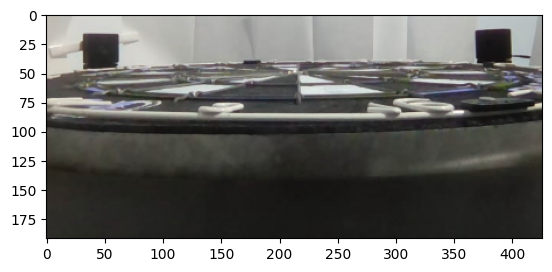

modified cropped Frame


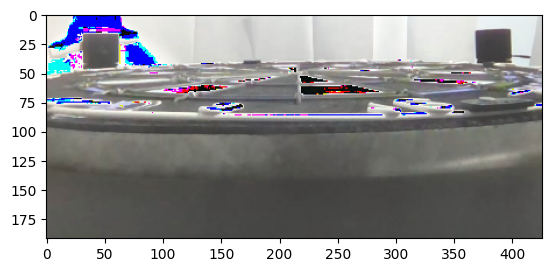

In [11]:
# modifying cropped frame to show difference

modifiedcroppedFrame = croppedFrame + np.random.randint(35, 61)
print("croppedFrame")
plt.show(plt.imshow(croppedFrame))
print("modified cropped Frame")
plt.show(plt.imshow(modifiedcroppedFrame))

In [12]:
beforeframe = croppedFrame
afterframe = modifiedcroppedFrame

1. `create_difference`

calculating difference


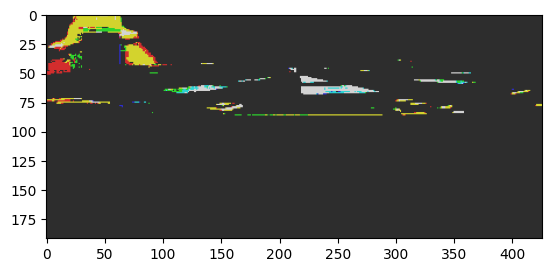


converted img from rgb to gray


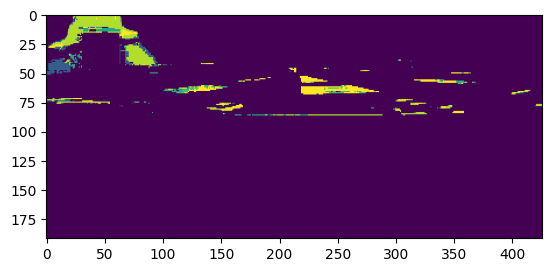


geglättetes Bild mit Kernelgröße: 5


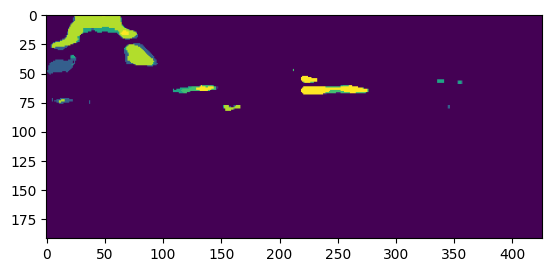

In [13]:
# Berechnung absolute Differenz zwischen den übergebenen Bildern
diff = cv2.absdiff(beforeframe, afterframe)
print("calculating difference")
plt.show(plt.imshow(diff))
print()

# Umwandlung Farbformat von RGB nach Graustufen
grayscale = cv2.cvtColor(diff, cv2.COLOR_RGB2GRAY)
print("converted img from rgb to gray")
plt.show(plt.imshow(grayscale))
print()

# Bildglättung mit Medianfilter mit ksize-Filterfenstergröße
ksize = 5
blurred = cv2.medianBlur(grayscale, ksize)
print(f"geglättetes Bild mit Kernelgröße: {ksize}")
plt.show(plt.imshow(blurred))
print()

2. Combination of three thresholding methods

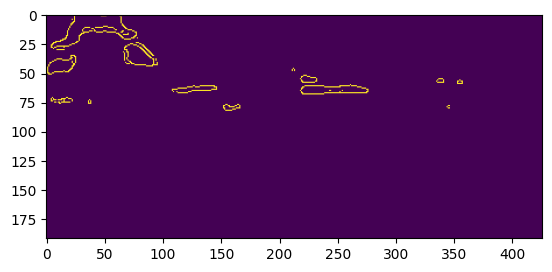

In [14]:
# Using Canny-Algorithm for Kantendetektion
can = cv2.Canny(blurred, 30, 90)
plt.show(plt.imshow(can))

triangle_threshold: 46


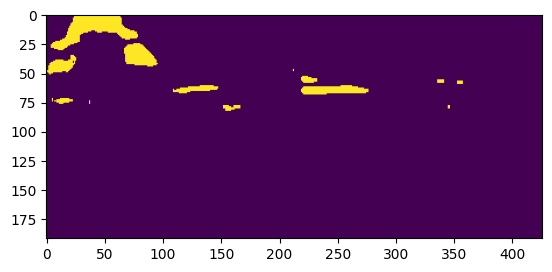

In [15]:
# Return threshold value based on the triangle algorithm
triangle_threshold = skimage.filters.threshold_triangle(blurred)
print(f"triangle_threshold: {triangle_threshold}")
_, triangle = cv2.threshold(blurred, triangle_threshold, 255, cv2.THRESH_BINARY)
plt.show(plt.imshow(triangle))

yen_threshold: 45


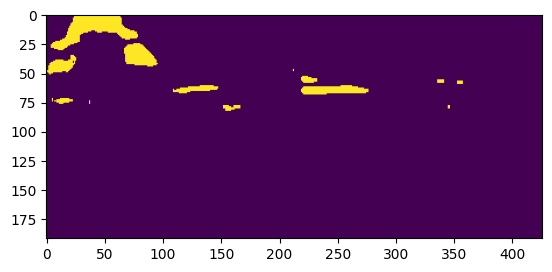

In [16]:
# Return threshold value based on Yen´s method
yen_threshold = skimage.filters.threshold_yen(blurred)
print(f"yen_threshold: {yen_threshold}")
_, yen = cv2.threshold(blurred, yen_threshold, 255, cv2.THRESH_BINARY)
plt.show(plt.imshow(yen))

li_threshold: 48.61068319640063


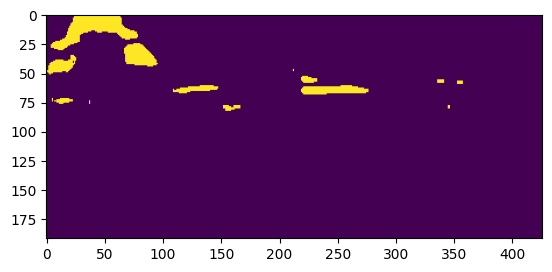

In [17]:
# Return threshold value based on Li´s iterative Minimum Cross Entropy method
li_threshold = skimage.filters.threshold_li(blurred)
print(f"li_threshold: {li_threshold}")
_, li = cv2.threshold(blurred, li_threshold, 255, cv2.THRESH_BINARY)
plt.show(plt.imshow(li))

combined_thresh: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]



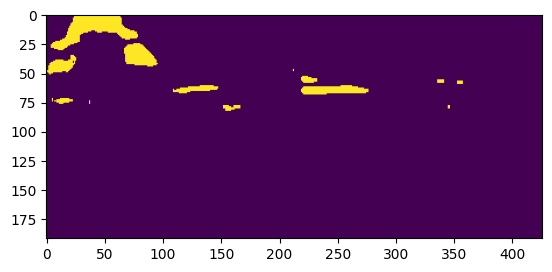

In [18]:
# Skalierung der Werte in einem Bild (auch hin zu Absolutwerten)
combined_threshs = (triangle/3) + (yen/3) + (li/3)
print(f"combined_thresh: {combined_threshs}" + "\n")
combined_threshs = cv2.convertScaleAbs(combined_threshs)
ret, all = cv2.threshold(combined_threshs, 150, 255, cv2.THRESH_BINARY)
plt.show(plt.imshow(all))

3. Morphological operations to remove noise

- Öffnen (Opening)\
Definition: Eine Kombination von Erosion, gefolgt von Dilatation.\
Zweck: Entfernt Rauschen und glättet die Konturen von Objekten.\
Wie es hilft: Es entfernt kleinere unerwünschte Elemente (z. B. isolierte weiße Punkte), während größere Strukturen intakt bleiben.

- Schließen (Closing)\
Definition: Eine Kombination aus Dilatation, gefolgt von Erosion.\
Zweck: Füllt kleine Lücken oder Löcher innerhalb von Objekten.\
Wie es hilft: Schließen wird oft verwendet, um Unterbrechungen in Kanten oder Linien zu schließen.

In [19]:
# Morphological operations to remove noise
# kernels as ellipse with 3x5
kernelOpen = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,5))
kernelClose = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,5))

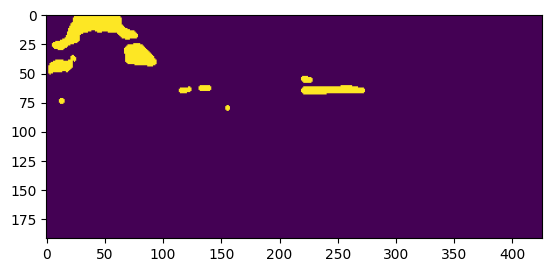

In [21]:
# Anwendung der erzeugten Kernel auf das combined_thresh img
morphological_kernelOpen = cv2.morphologyEx(all, cv2.MORPH_OPEN, kernelOpen)
plt.show(plt.imshow(morphological_kernelOpen))

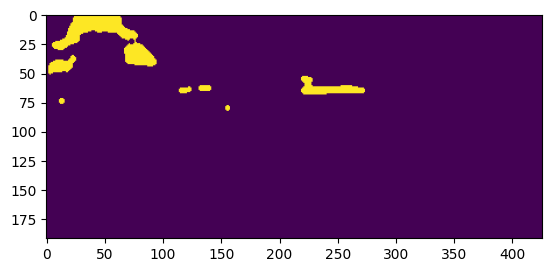

In [23]:
morphological_kernelClose = cv2.morphologyEx(morphological_kernelOpen, cv2.MORPH_CLOSE, kernelClose)
plt.show(plt.imshow(morphological_kernelClose))
img_preprocessed = morphological_kernelClose

geglättetes Bild


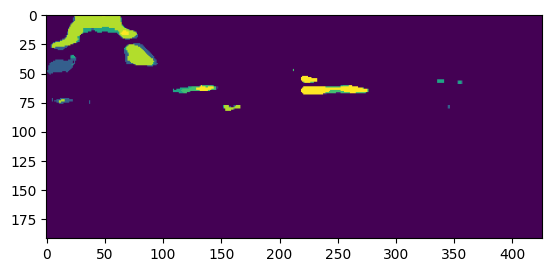

Anwendung threshold..


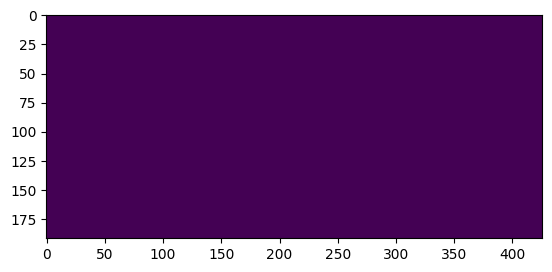

In [27]:
# Berechnung threshold & Anwendung Open/Close - Kernel auf geglättetes Bild vom Anfang
# mithilfe des übergebenen Parameters "thresh_val"
thresh_val = 15
print(f"geglättetes Bild")
plt.show(plt.imshow(blurred))

_, thresh = cv2.threshold(blurred, thresh_val, 255, cv2.THRESH_BINARY)
print("Anwendung threshold..")
plt.show(plt.imshow(thresh))

Anwendung Kernel Open


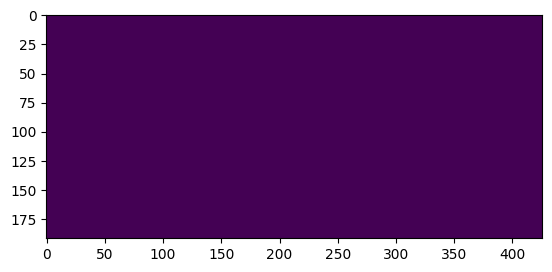

In [28]:
# Anwendung Open Kernel
thresh_morph_kernelOpen = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernelOpen)
print("Anwendung Kernel Open")
plt.show(plt.imshow(thresh_morph_kernelOpen))

Anwendung Kernel Close


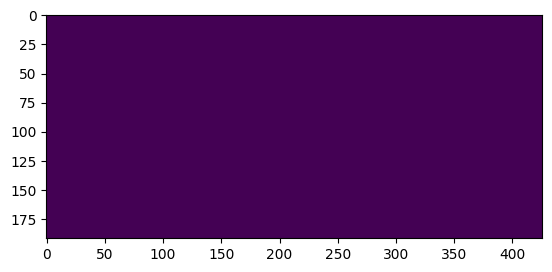

In [29]:
# Anwendung Close Kernel
thresh_morph_kernelClose = cv2.morphologyEx(thresh_morph_kernelOpen, cv2.MORPH_CLOSE, kernelClose)
print("Anwendung Kernel Close")
plt.show(plt.imshow(thresh_morph_kernelClose))

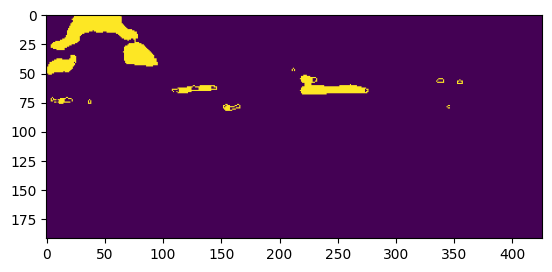

In [33]:
# Combine thresholded image with Canny edge detector
final = img_preprocessed | can
plt.show(plt.imshow(final))

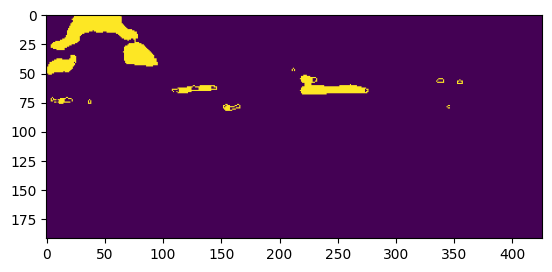

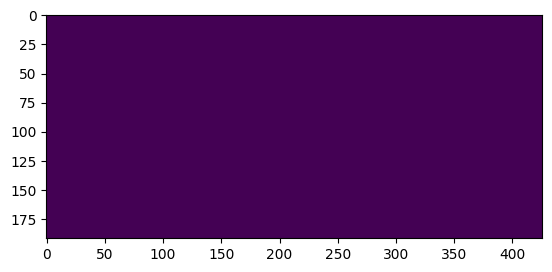

In [34]:
# Returns:
plt.show(plt.imshow(final))
plt.show(plt.imshow(thresh_morph_kernelClose))

### `find_dart_tip`

- Results in innacurate dart tip locations, but accurately detects the presence of a dart\
`aX = find_dart_tip(processedImageA)`

- Accurately detects dart tip locations, but results in false positives\
`existsA = find_dart_tip(threshA)`